<ipython-input-8-5669bb332a9a>:35: ComplexWarning: Casting complex values to real discards the imaginary part
  e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])


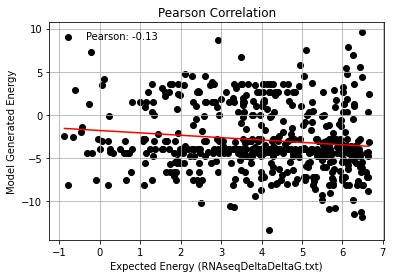

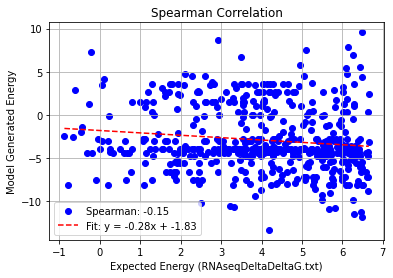

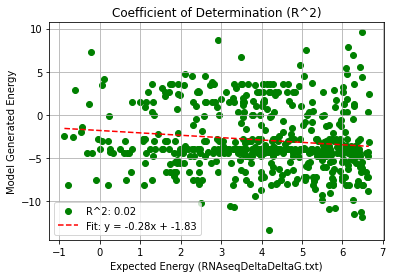

Pearson rank correlation coefficient: -0.131
Spearman rank correlation coefficient: -0.146
Coefficient of Determination (R^2): 0.017


In [8]:
#### import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

gamma_file_name = 'mutation_phi_gamma/2izn_native_trainSetFiles_phi_pairwise_contact_well-9.5_9.5_0.7_10_gamma_filtered'
phi_file_name = 'mutation_phi_gamma/2izn_mut_phi_pairwise_contact_well_native_Rmodified_decoys_CPLEX_randomization_-9.5_9.5_0.7_10'

# Load gamma data
gamma = np.loadtxt(gamma_file_name, dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})

# Determine the number of phis in each line
with open(phi_file_name, "r") as file:
    first_line = file.readline()
    total_phis = len(first_line.strip().split())

# Count the number of decoys
num_decoys = sum(1 for line in open(phi_file_name))

# Initialize phi_i_decoy array
phi_i_decoy = np.zeros((num_decoys, total_phis))

# Read all data
with open(phi_file_name, "r") as file:
    for i_decoy, line in enumerate(file):
        if i_decoy >= num_decoys:
            break
        line = line.strip().split()
        for i_phi, value in enumerate(line):
            phi_i_decoy[i_decoy][i_phi] = float(value)

# Calculate energy for each decoy
e_decoy = np.zeros(num_decoys)
for i_decoy in range(num_decoys):
    e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])

# Save energy data
np.savetxt('Energy_mg.txt', e_decoy, fmt='%f', delimiter='\n')

# Load data for correlation calculation
data1 = np.loadtxt('RNAseqDeltaDeltaG.txt')
data2 = np.loadtxt('Energy_mg.txt')

# Pearson correlation
correlation_coefficient, _ = pearsonr(data1, data2)
slope, intercept = np.polyfit(data1, data2, 1)
x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.scatter(data1, data2, color='black', label=f'Pearson: {correlation_coefficient:.2f}')
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)')
plt.ylabel('Model Generated Energy')
plt.title('Pearson Correlation')
plt.legend(frameon=False, loc='upper left')
plt.grid(True)
plt.show()

# Spearman correlation
spearman_coefficient, _ = spearmanr(data1, data2)
slope, intercept = np.polyfit(data1, data2, 1)
x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.scatter(data1, data2, color='blue', label=f'Spearman: {spearman_coefficient:.2f}')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)')
plt.ylabel('Model Generated Energy')
plt.title('Spearman Correlation')
plt.legend()
plt.grid(True)
plt.show()

# R-squared
slope, intercept = np.polyfit(data1, data2, 1)
predicted = slope * data1 + intercept

ss_res = np.sum((data2 - predicted) ** 2)
ss_tot = np.sum((data2 - np.mean(data2)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept
plt.scatter(data1, data2, color='green', label=f'R^2: {r_squared:.2f}')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)')
plt.ylabel('Model Generated Energy')
plt.title('Coefficient of Determination (R^2)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pearson rank correlation coefficient: {correlation_coefficient:.3f}")
print(f"Spearman rank correlation coefficient: {spearman_coefficient:.3f}")
print(f"Coefficient of Determination (R^2): {r_squared:.3f}")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

gamma_file_name = 'mutation_phi_gamma/native_trainSetFiles_phi_pairwise_contact_well-9.5_9.5_0.7_10_gamma_filtered'
phi_file_name = 'mutation_phi_gamma/phi_pairwise_contact_well_native_Rmodified_decoys_CPLEX_randomization_-9.5_9.5_0.7_10'

# Load gamma data
gamma = np.loadtxt(gamma_file_name, dtype=complex, converters={0: lambda s: complex(s.decode().replace('+-', '-'))})

# Determine the number of phis in each line
with open(phi_file_name, "r") as file:
    first_line = file.readline()
    total_phis = len(first_line.strip().split())

# Count the number of decoys
num_decoys = sum(1 for line in open(phi_file_name))

# Initialize phi_i_decoy array
phi_i_decoy = np.zeros((num_decoys, total_phis))

# Read all data
with open(phi_file_name, "r") as file:
    for i_decoy, line in enumerate(file):
        if i_decoy >= num_decoys:
            break
        line = line.strip().split()
        for i_phi, value in enumerate(line):
            phi_i_decoy[i_decoy][i_phi] = float(value)

# Calculate energy for each decoy
e_decoy = np.zeros(num_decoys)
for i_decoy in range(num_decoys):
    e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])

# Save energy data
np.savetxt('Energy_mg.txt', e_decoy, fmt='%f', delimiter='\n')

# Load data for correlation calculation
data1 = np.loadtxt('RNAseqDeltaDeltaG.txt')
data2 = np.loadtxt('Energy_mg.txt')

# Pearson correlation
correlation_coefficient, _ = pearsonr(data1, data2)
slope, intercept = np.polyfit(data1, data2, 1)
x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.figure(figsize=(12, 8), dpi=300)
plt.scatter(data1, data2, color='black', label=f'Pearson: {correlation_coefficient:.2f}', s=30, alpha=0.7, edgecolor='k')
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)', fontsize=14)
plt.ylabel('Model Generated Energy', fontsize=14)
plt.title('2bu1 PHI 9.5(Pearson Correlation)', fontsize=16)
plt.legend(frameon=False, loc='upper left')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('Pearson_Correlation.png', format='png', bbox_inches='tight')
plt.show()

# Spearman correlation
spearman_coefficient, _ = spearmanr(data1, data2)
slope, intercept = np.polyfit(data1, data2, 1)
x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.figure(figsize=(12, 8), dpi=300)
plt.scatter(data1, data2, color='blue', label=f'Spearman: {spearman_coefficient:.2f}', s=10, alpha=0.7, edgecolor='b')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)', fontsize=14)
plt.ylabel('Model Generated Energy', fontsize=14)
plt.title('Spearman Correlation', fontsize=16)
plt.legend(frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('Spearman_Correlation.png', format='png', bbox_inches='tight')
plt.show()

# R-squared
slope, intercept = np.polyfit(data1, data2, 1)
predicted = slope * data1 + intercept

ss_res = np.sum((data2 - predicted) ** 2)
ss_tot = np.sum((data2 - np.mean(data2)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.figure(figsize=(12, 8), dpi=300)
plt.scatter(data1, data2, color='green', label=f'R^2: {r_squared:.2f}', s=10, alpha=0.7, edgecolor='g')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)', fontsize=14)
plt.ylabel('Model Generated Energy', fontsize=14)
plt.title('Coefficient of Determination (R^2)', fontsize=16)
plt.legend(frameon=False)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig('R_squared.png', format='png', bbox_inches='tight')
plt.show()

print(f"Pearson rank correlation coefficient: {correlation_coefficient:.3f}")
print(f"Spearman rank correlation coefficient: {spearman_coefficient:.3f}")
print(f"Coefficient of Determination (R^2): {r_squared:.3f}")

<ipython-input-2-7d725667f8cf>:34: ComplexWarning: Casting complex values to real discards the imaginary part
  e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])


TypeError: len() of unsized object

Manual Correlation Code:




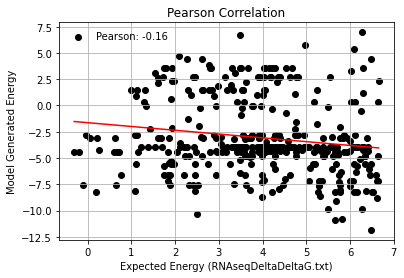

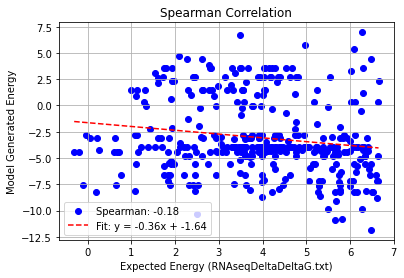

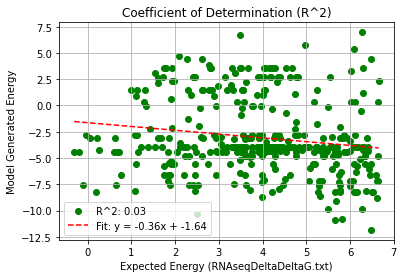

Pearson rank correlation coefficient: -0.162
Spearman rank correlation coefficient: -0.185
Coefficient of Determination (R^2): 0.026


In [11]:
#### import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Load data for correlation calculation
data1 = np.loadtxt('RNAseqDeltaDeltaG.txt')
data2 = np.loadtxt('Energy_mg.txt')

# Pearson correlation
correlation_coefficient, _ = pearsonr(data1, data2)
slope, intercept = np.polyfit(data1, data2, 1)
x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.scatter(data1, data2, color='black', label=f'Pearson: {correlation_coefficient:.2f}')
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)')
plt.ylabel('Model Generated Energy')
plt.title('Pearson Correlation')
plt.legend(frameon=False, loc='upper left')
plt.grid(True)
plt.show()

# Spearman correlation
spearman_coefficient, _ = spearmanr(data1, data2)
slope, intercept = np.polyfit(data1, data2, 1)
x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept

plt.scatter(data1, data2, color='blue', label=f'Spearman: {spearman_coefficient:.2f}')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)')
plt.ylabel('Model Generated Energy')
plt.title('Spearman Correlation')
plt.legend()
plt.grid(True)
plt.show()

# R-squared
slope, intercept = np.polyfit(data1, data2, 1)
predicted = slope * data1 + intercept

ss_res = np.sum((data2 - predicted) ** 2)
ss_tot = np.sum((data2 - np.mean(data2)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

x_vals = np.array([min(data1), max(data1)])
y_vals = slope * x_vals + intercept
plt.scatter(data1, data2, color='green', label=f'R^2: {r_squared:.2f}')
plt.plot(x_vals, y_vals, '--r', label=f'Fit: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('Expected Energy (RNAseqDeltaDeltaG.txt)')
plt.ylabel('Model Generated Energy')
plt.title('Coefficient of Determination (R^2)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Pearson rank correlation coefficient: {correlation_coefficient:.3f}")
print(f"Spearman rank correlation coefficient: {spearman_coefficient:.3f}")
print(f"Coefficient of Determination (R^2): {r_squared:.3f}")